<a href="https://colab.research.google.com/github/Paodidom/Evento-25-marzo-SF-Club-Unipi/blob/main/7_Bollinger_MACD_Myownlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 7 - Bande di Bollinger ed MACD

## Caricamento librerie/moduli standard

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Caricamento libreria da GitHub

In [ ]:
import httpimport as imp

GitHubSF='https://raw.githubusercontent.com/Paodidom/Evento-25-marzo-SF-Club-Unipi/9757fef839a2cc93434e11edd301e411275316d4/StartingShared/'

with imp.remote_repo(GitHubSF):
    import metcomputlib as mc

with imp.remote_repo(GitHubSF):
    import myownlib as my

## Moduli disponibili

In [ ]:
mc.Ver()

------------------------------------------------------------------------------------------
Saturday, March 22, 2025, 12:52:05
Platform : Linux-6.1.85+-x86_64-with-glibc2.35
------------------------------------------------------------------------------------------
Python 3.11.11 (main, Dec  4 2024, 08:55:07) [GCC 11.4.0]
JupyterLab NONE
------------------------------------------------------------------------------------------
Matplotlib 3.10.0
Pandas 2.2.2
NumPy 2.0.2
SciPy 1.14.1
------------------------------------------------------------------------------------------


## Caricamento Dati

In [ ]:
# load csv in a DataFrame
Aapl = mc.ReadStockPrices(GitHubSF+'AAPL.csv')

# define the time period of interest
day1 = np.datetime64('2000-01-01')
day2 = np.datetime64('2000-02-15')

# extract single columns from DataFrame
D = Aapl['Date'].values
O = Aapl['Open'].values
H = Aapl['High'].values
L = Aapl['Low'].values
C = Aapl['Close'].values
V = Aapl['Volume'].values

## Calcolo Bande Bollinger ed MACD Lines

In [ ]:
p=20
ds=2
Btop, Bmedian, Bbottom = my.Bollinger(C, p, ds)

ps=12
pl=26
pg=9
macd, signal, macdhist = my.Macd(C, ps, pl, pg)

## Figura con function da libreria myownlib.py

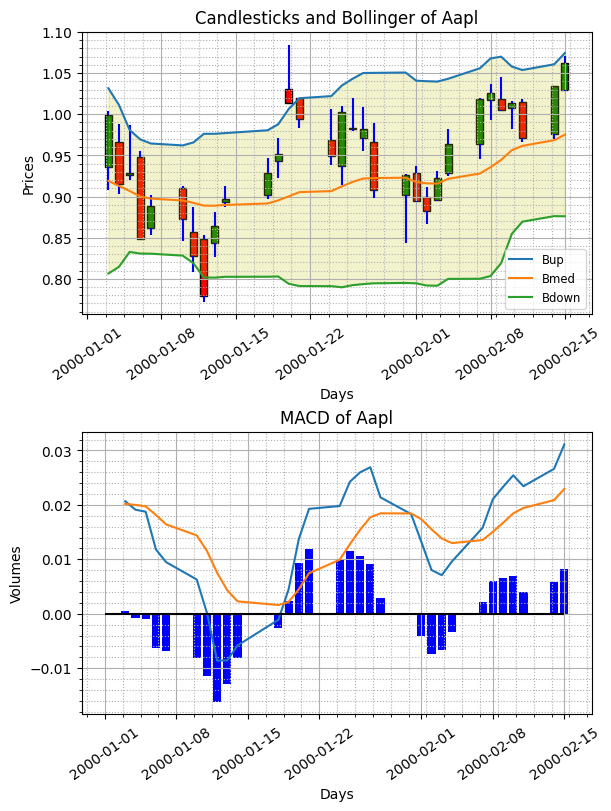

In [ ]:
plt.figure(figsize=(6, 8), layout='constrained')
# First subplot
plt.subplot(2, 1, 1)
my.PlotCandles(D, O, H, L, C, day1, day2)
my.PlotData(D, Btop, day1, day2, Label='Bup')
my.PlotData(D, Bmedian, day1, day2, Label='Bmed')
my.PlotData(D, Bbottom, day1, day2, Label='Bdown')
mc.FillBetween(D, Btop, Bbottom, day1, day2, Color='y')
mc.EndChart(Legend='on', Xlabel='Days', Ylabel='Prices', Title='Candlesticks and Bollinger of Aapl')
# Second subplot
plt.subplot(2, 1, 2)
my.PlotData(D, macd, day1, day2, Label='MACD Line')
my.PlotData(D, signal, day1, day2, Label='Signal Line')
my.PlotBars(D, macdhist, day1, day2, Color='b')
plt.hlines(y=0, xmin=day1, xmax=day2, linewidth=1.5, color='k')
mc.EndChart(Xlabel='Days', Ylabel='Volumes', Title='MACD of Aapl')
#
plt.show()